In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.feature_selection import RFE, RFECV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('/kaggle/input/trexquant-2025-summer-intern-challenge-iitkgp/TQ_Train_Kaggle.csv')
df

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target
0,1,1.65,-3.48,NaN,0.12,0.22,0.20,NaN,-0.29,-0.36,-1.88,-2.82,NaN,NaN,NaN,0.09,-0.72,0.12,1.11,3.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,-0.41,0.44,0.00,NaN,-1.66,-0.63,NaN,NaN,0.77,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN,NaN,0.39,2.82,3.52,NaN,0.72,0.62,-1.01,-0.97,0.02,NaN,0.02,NaN,1.47,NaN,0.00,-3.11,NaN,-4.00,NaN,NaN,NaN,0.50,NaN,0.26,-2.20,0.66,-2.20,NaN,0.03,0.01,0.30,-0.14,-1.95,NaN,0.99,-0.08
1,2,2.55,-0.93,NaN,0.17,0.27,0.08,NaN,-0.40,-0.54,-1.87,1.22,NaN,NaN,0.08,0.85,-0.76,-0.02,2.01,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,NaN,NaN,-2.11,NaN,NaN,0.66,0.96,NaN,NaN,NaN,NaN,NaN,NaN,2.19,NaN,NaN,-1.22,-0.22,-3.60,NaN,0.91,-0.97,-0.77,-0.97,0.02,NaN,0.01,-0.09,-3.61,NaN,0.00,-3.11,NaN,-4.00,NaN,NaN,NaN,0.50,NaN,0.24,-0.80,0.57,-0.81,NaN,0.16,0.00,0.19,1.18,0.12,NaN,-0.22,0.06
2,3,-3.73,0.99,NaN,0.15,0.16,0.40,NaN,-0.66,1.51,-1.66,-0.90,NaN,NaN,1.00,0.59,-3.18,-0.71,-2.74,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,NaN,NaN,0.99,NaN,NaN,0.67,0.46,NaN,NaN,NaN,NaN,NaN,NaN,-0.13,NaN,NaN,0.44,-0.55,3.35,NaN,1.52,0.68,-0.85,0.37,0.02,NaN,0.11,0.22,0.45,NaN,0.00,-1.14,NaN,-4.00,NaN,NaN,NaN,0.76,NaN,0.22,0.15,0.52,0.21,NaN,0.04,0.00,0.18,-0.73,-0.37,NaN,0.36,0.00
3,4,2.12,0.04,NaN,0.12,0.76,-0.02,NaN,-0.27,-1.61,-1.77,-1.16,NaN,NaN,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,NaN,NaN,NaN,NaN,NaN,-0.09,NaN,0.09,0.35,0.44,0.00,1.53,1.90,0.24,NaN,NaN,0.10,NaN,NaN,0.81,0.65,NaN,NaN,NaN,NaN,NaN,NaN,-0.49,NaN,NaN,3.45,0.87,3.03,NaN,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,NaN,-4.00,NaN,NaN,NaN,0.55,NaN,0.19,-0.37,0.49,-0.40,NaN,0.08,0.00,0.33,-0.40,-0.19,NaN,0.01,-0.03
4,5,-0.85,-0.02,NaN,0.22,0.12,-0.27,NaN,1.56,-0.36,-2.62,-1.59,NaN,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.09,0.21,0.43,0.00,1.49,1.88,NaN,NaN,NaN,0.70,NaN,NaN,0.87,2.47,NaN,NaN,NaN,NaN,NaN,NaN,-0.65,NaN,NaN,1.20,2.58,3.76,NaN,0.93,0.90,-1.49,0.40,0.02,NaN,0.03,-0.04,-0.94,-0.19,-0.05,-3.11,NaN,0.06,NaN,NaN,NaN,0.34,NaN,0.06,1.64,0.23,1.50,NaN,0.05,0.00,0.54,0.51,-0.08,NaN,-0.01,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,NaN,NaN,NaN,-2.19,-0.19,1.33,-1.53,NaN,NaN,NaN,1.37,1.12,-1.67,0.21,-0.47,-0.34,NaN,0.05,0.43,0.86,1.00,0.34,3.12,NaN,-1.41,NaN,-1.44,-1.19,NaN,NaN,0.34,0.56,0.25,NaN,NaN,NaN,0.18,-1.02,0.31,2.77,-4.00,-2.42,3.92,NaN,-0.87,0.24,-0.04,-0.97,0.24,NaN,NaN,NaN,-4.00,NaN,0.01,0.37,NaN,0.00,NaN,0.50,-1.33,0.42,0.28,0.08,0.13,0.19,-0.80,NaN,0.14,0.02,0.46,NaN,0.10,3.48,-0.28,0.00
105438,173659,-1.37,0.29,NaN,0.06,0.00,0.16,NaN,0.34,0.24,-2.28,-1.51,-0.46,NaN,NaN,NaN,NaN,0.09,0.69,0.04,NaN,NaN,NaN,-2.43,1.14,-4.00,2.44,-0.18,NaN,NaN,0.25,0.24,NaN,0.00,0.00,2.78,-0.04,NaN,NaN,NaN,0.52,NaN,NaN,0.55,-1.46,-0.62,NaN,NaN,NaN,0.34,1.89,0.39,-0.12,1.31,-0.05,NaN,NaN,NaN,-0.78,NaN,-0.78,-0.24,NaN,NaN,NaN,2.78,NaN,-0.03,0.50,NaN,0.00,NaN,0.12,1.80,0.22,0.06,NaN,NaN,0.19,-1.41,NaN,NaN,NaN,NaN,NaN,0.92,1.09,0.98,-0.01
105439,173670,0.05,0.34,NaN,0.08,0.22,-0.16,NaN,0.18,0.18,-1.16,-2.15,-1.16,NaN,NaN,NaN,-2.17,-0.42,1.29,-1.02,NaN,NaN,NaN,-3.83,-0.30,-2.54,0.84,-0.37,-0.53,NaN,0.19,0.28,-1.21,0.00,0.34,3.12,-0.01,-2.00,NaN,NaN,0.47,NaN,NaN,0.42,-1.32,-0.38,-0.50

In [5]:
X = df.drop(columns=['row_id', 'target'])
y = df['target']

In [6]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=1, alpha=10, n_estimators=2000)

# Train the model with the selected features
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("mse:", mse)

mse: 0.004160260272176903


In [6]:
# Load Test Dataset
df_test = pd.read_csv("/kaggle/input/trexquant-2025-summer-intern-challenge-iitkgp/TQ_Test_Kaggle.csv")
print("df_test.shape:", df_test.shape)

X_test = df_test.drop(columns=['row_id'])

# Predict 
y_test = model.predict(X_test)

print("\nGenerating Predictions: Success")

df_test.shape: (85821, 88)

Generating Predictions: Success


In [7]:
# Create DataFrame for predictions
df_output = pd.DataFrame({"row_id": np.array(df_test['row_id']), 'target': y_test})

# Define filename for saving predictions
filename = "/kaggle/working/predictions_xgb_2k_n_estimator.csv"

# Save predictions to CSV file
df_output.to_csv(filename, index=False)

print(f"Successfully Saved in File: {filename}")

Successfully Saved in File: /kaggle/working/predictions_xgb_2k_n_estimator.csv


# corr cols to drop

In [8]:
feature_importance = model.get_booster().get_score(importance_type='weight')

In [9]:
xgb_imp = pd.DataFrame({'Features': feature_importance.keys(), 'Importance': feature_importance.values()}).sort_values(by='Importance', ascending=False)
xgb_imp

,Features,Importance
18,f21,70.00
70,f84,65.00
19,f23,60.00
32,f39,59.00
23,f28,57.00
35,f43,55.00
2,f3,54.00
29,f35,49.00
41,f51,48.00
57,f70,47.00


In [10]:
q1 = xgb_imp['Importance'].quantile(0.25)
q2 = xgb_imp['Importance'].quantile(0.50)
q3 = xgb_imp['Importance'].quantile(0.75)

In [11]:
(q1, q2, q3)

(15.0, 25.0, 35.75)

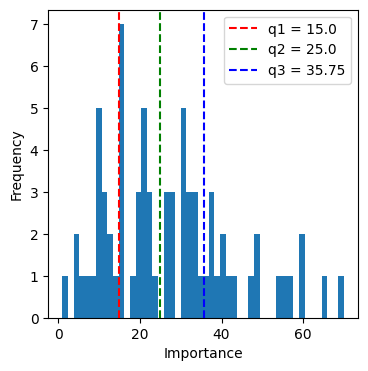

In [12]:
# Create a histogram
plt.figure(figsize=(4, 4))
plt.hist(xgb_imp['Importance'], bins=50)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Frequency')

plt.axvline(x=q1, color='r', linestyle='--', label=f'q1 = {q1}')
plt.axvline(x=q2, color='g', linestyle='--', label=f'q2 = {q2}')
plt.axvline(x=q3, color='b', linestyle='--', label=f'q3 = {q3}')

plt.legend()

# Show plot
plt.show()